In [4]:
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Content Type Analysis
- Below we are doing content type analysis using the Doc2Vec model

## First Step
- Identify the data that we will be using
- For the context of this practice we will be using the in community tweets and the ones that are being retweeted the most.
- id is the unique id of each tweet, and the retweet id is the id of the tweet. So the relation betweent id and retweet id is one-to-many.

In [5]:
# first get all the og tweets, user info and retweets
client = MongoClient('localhost', 27017)

databases = ['070823_ml_community_4', 'ml_community_1', 'new_all_tweets_ml_community_2', 'rachel_chess_community']
all_original_tweets = {}
all_user_info = {}
all_retweets_in_community = {}
all_retweets_out_community = {}
all_retweets_out_by_in_community = {}

for db_name in databases:
    db = client[db_name]

    # get OG tweets
    og_tweet_collection = db['original_tweets']
    og_tweet_df = pd.DataFrame(list(og_tweet_collection.find()))
    og_tweet_df['user_id'] = og_tweet_df['user_id'].astype(int)
    og_tweet_df['id'] = og_tweet_df['id'].astype(int)
    all_original_tweets[db_name] = og_tweet_df

    # get user info
    user_collection = db['user_info']
    user_df = pd.DataFrame(list(user_collection.find()))
    user_df['userid'] = user_df['userid'].astype(int)
    all_user_info[db_name] = user_df

    # get the in community retweets
    retweet_in_community_collection = db['retweets_of_in_community']
    retweet_in_community_df = pd.DataFrame(list(retweet_in_community_collection.find()))
    retweet_in_community_df['retweet_id'] = retweet_in_community_df['retweet_id'].astype(int)
    all_retweets_in_community[db_name] = retweet_in_community_df

    # get the tweets that were retweeted by out community members
    if db_name != 'rachel_chess_community':
        retweet_out_community_collection = db['retweets_of_out_community']
    else:
        retweet_out_community_collection = db['retweets_of_in_community_by_out_community']

    retweet_out_community_df = pd.DataFrame(list(retweet_out_community_collection.find()))
    retweet_out_community_df['retweet_id'] = retweet_out_community_df['retweet_id'].astype(int)
    all_retweets_out_community[db_name] = retweet_out_community_df

    # get the tweets that were posted out community but retweeted by in community members
    retweet_out_by_in_community_collection = db['retweets_of_out_community_by_in_community']
    retweet_out_by_in_community_df = pd.DataFrame(list(retweet_out_by_in_community_collection.find()))
    retweet_out_by_in_community_df = retweet_out_by_in_community_df.dropna(subset=['retweet_id'])
    retweet_out_by_in_community_df['retweet_id'] = retweet_out_by_in_community_df['retweet_id'].astype(int)
    all_retweets_out_by_in_community[db_name] = retweet_out_by_in_community_df

## Second Step
- Graph the retweet counts

### In Community Retweets

    retweet_count  total_tweets  at_least
0               1          6981      8429
1               2           991      1448
2               3           243       457
3               4            97       214
4               5            60       117
5               6            20        57
6               7            11        37
7               8             7        26
8               9             9        19
9              10             3        10
10             11             1         7
11             12             2         6
12             13             1         4
13             17             3         3


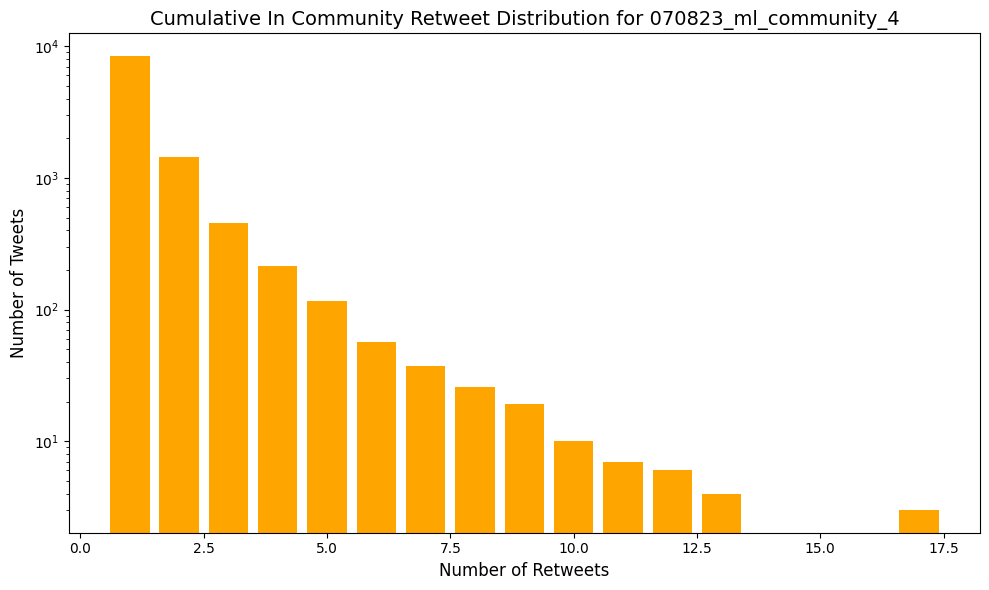

    retweet_count  total_tweets  at_least
0               1          2060      5421
1               2          2473      3361
2               3           402       888
3               4           244       486
4               5            86       242
5               6            66       156
6               7            28        90
7               8            21        62
8               9             9        41
9              10            12        32
10             11             9        20
11             12             2        11
12             13             1         9
13             15             2         8
14             16             2         6
15             18             1         4
16             19             2         3
17             42             1         1


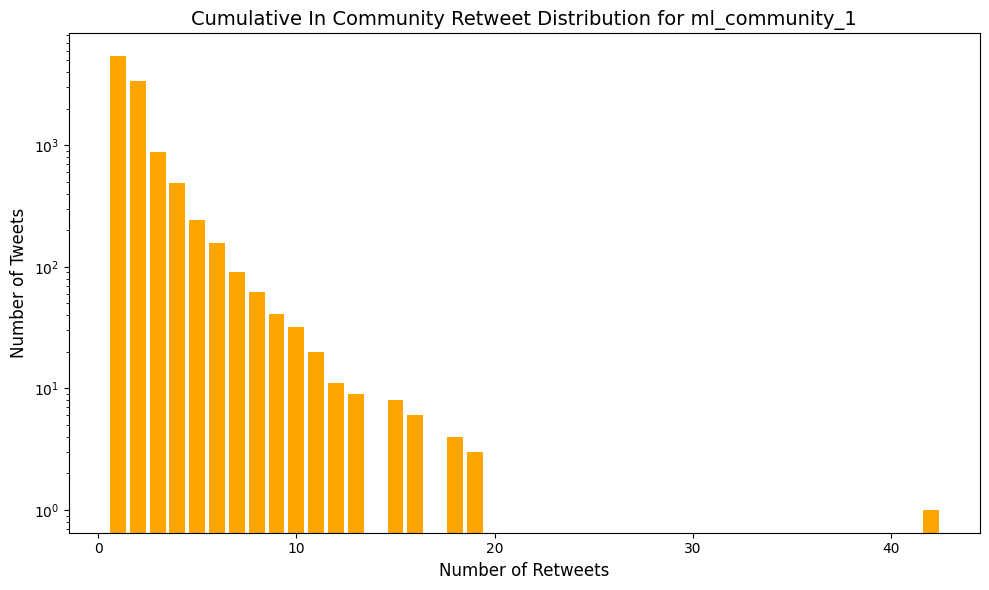

    retweet_count  total_tweets  at_least
0               1          5220      6726
1               2           924      1506
2               3           311       582
3               4           122       271
4               5            57       149
5               6            31        92
6               7            20        61
7               8            14        41
8               9             9        27
9              10             4        18
10             11             2        14
11             12             5        12
12             13             3         7
13             15             1         4
14             18             1         3
15             20             1         2
16             28             1         1


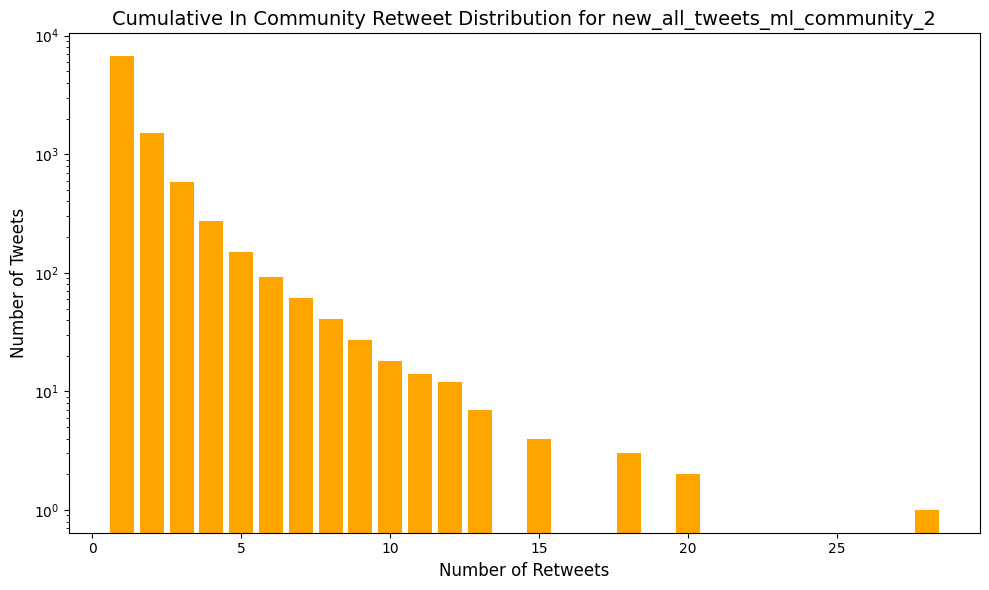

   retweet_count  total_tweets  at_least
0              1          6182      7027
1              2           692       845
2              3           117       153
3              4            26        36
4              5             4        10
5              6             4         6
6              8             1         2
7              9             1         1


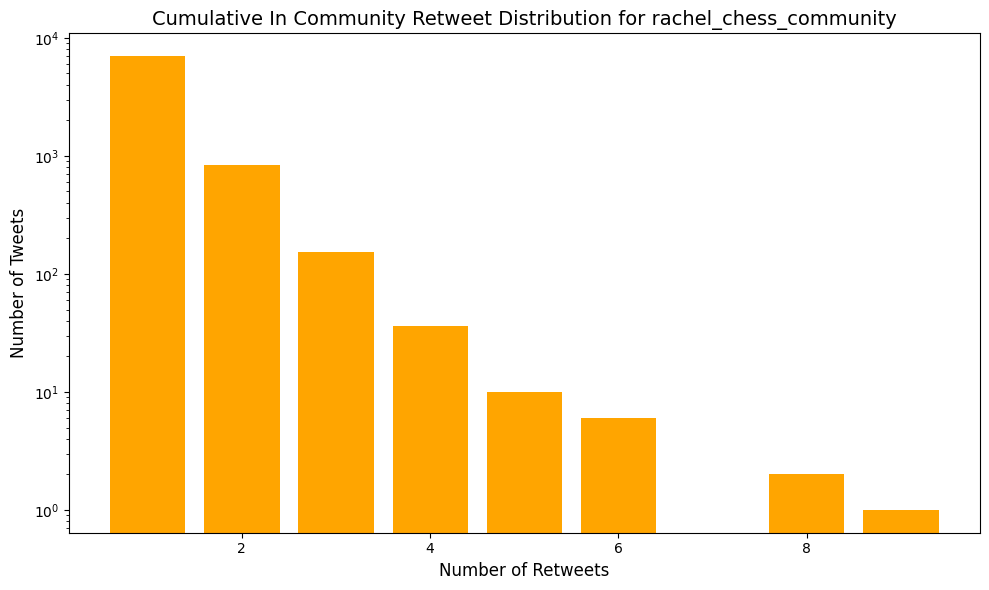

In [4]:
# group by retweet_id see how many times a tweet got retweewed
# retweet in community
for community, df in all_retweets_in_community.items():
    retweet_count = df.groupby('retweet_id').size().reset_index(name='retweet_count')
    count_category = retweet_count.groupby('retweet_count').size().reset_index(name='total_tweets')
    count_category = count_category.sort_values(by='retweet_count')
    count_category['at_least'] = count_category['total_tweets'][::-1].cumsum()
    print(count_category)

    plt.figure(figsize=(10, 6))
    plt.bar(count_category['retweet_count'], count_category['at_least'], color='orange')
    plt.xlabel('Number of Retweets', fontsize=12)
    plt.ylabel('Number of Tweets', fontsize=12)
    plt.title(f'Cumulative In Community Retweet Distribution for {community}', fontsize=14)

    plt.yscale('log')
    plt.tight_layout()
    plt.show()

### Out community retweets
- In communiy tweets that were retweeted by out community members

    retweet_count  total_tweets  at_least
0               1          5520      7309
1               2          1033      1789
2               3           377       756
3               4           135       379
4               5           112       244
5               6            37       132
6               7            26        95
7               8            24        69
8               9            12        45
9              10            11        33
10             11             9        22
11             12             2        13
12             13             4        11
13             14             2         7
14             15             1         5
15             17             1         4
16             18             1         3
17             19             1         2
18             38             1         1


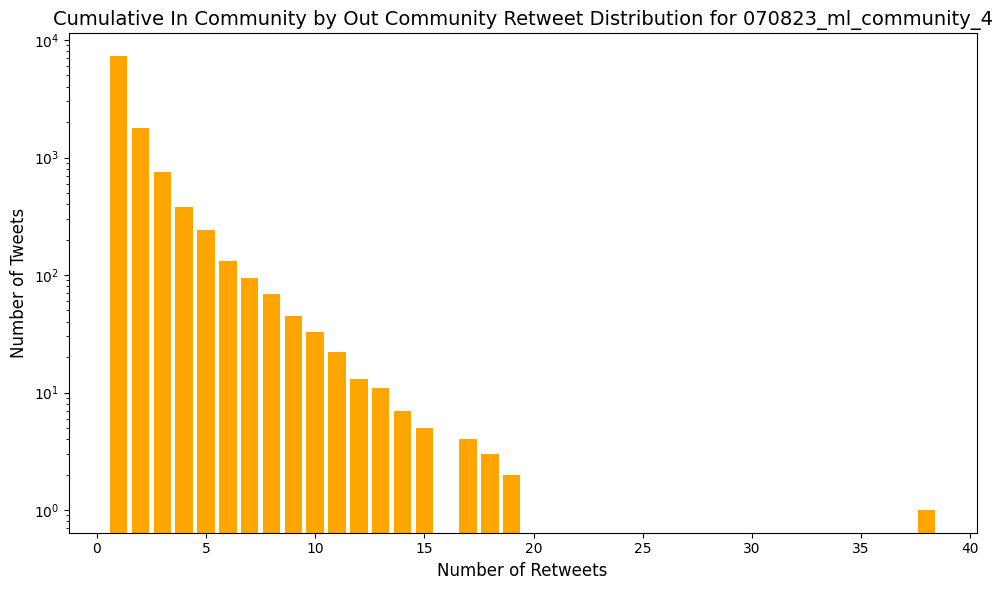

    retweet_count  total_tweets  at_least
0               1          3679      5840
1               2          1222      2161
2               3           445       939
3               4           190       494
4               5           104       304
5               6            72       200
6               7            40       128
7               8            24        88
8               9            16        64
9              10            11        48
10             11             5        37
11             12             9        32
12             13             7        23
13             14             5        16
14             15             2        11
15             16             1         9
16             17             1         8
17             18             1         7
18             21             1         6
19             24             1         5
20             25             2         4
21             29             1         2
22             33             1   

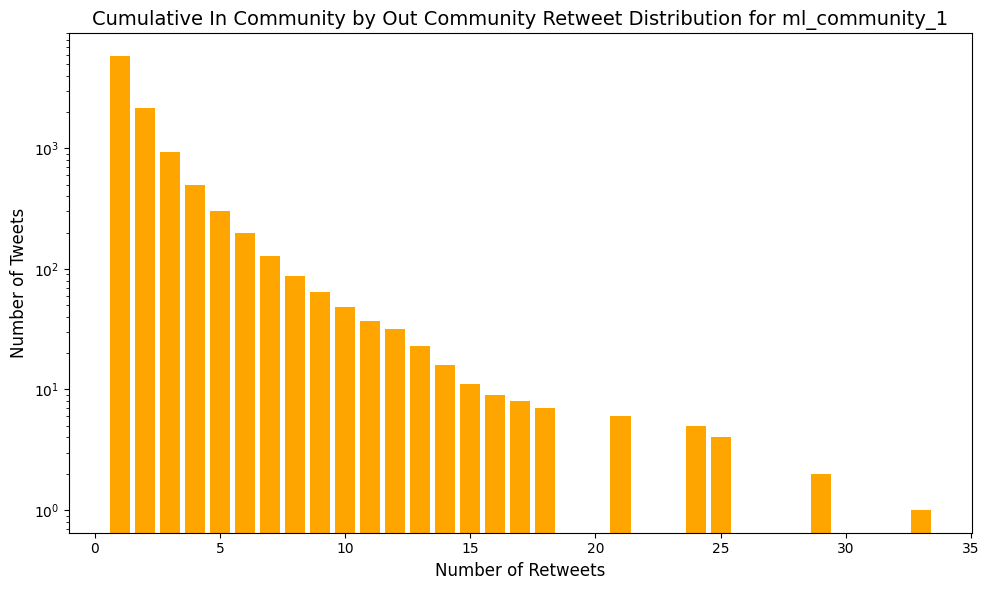

    retweet_count  total_tweets  at_least
0               1          5013      6933
1               2          1106      1920
2               3           412       814
3               4           186       402
4               5            82       216
5               6            54       134
6               7            25        80
7               8            17        55
8               9             9        38
9              10            11        29
10             11             4        18
11             12             3        14
12             13             4        11
13             14             1         7
14             15             1         6
15             16             1         5
16             17             2         4
17             19             1         2
18             27             1         1


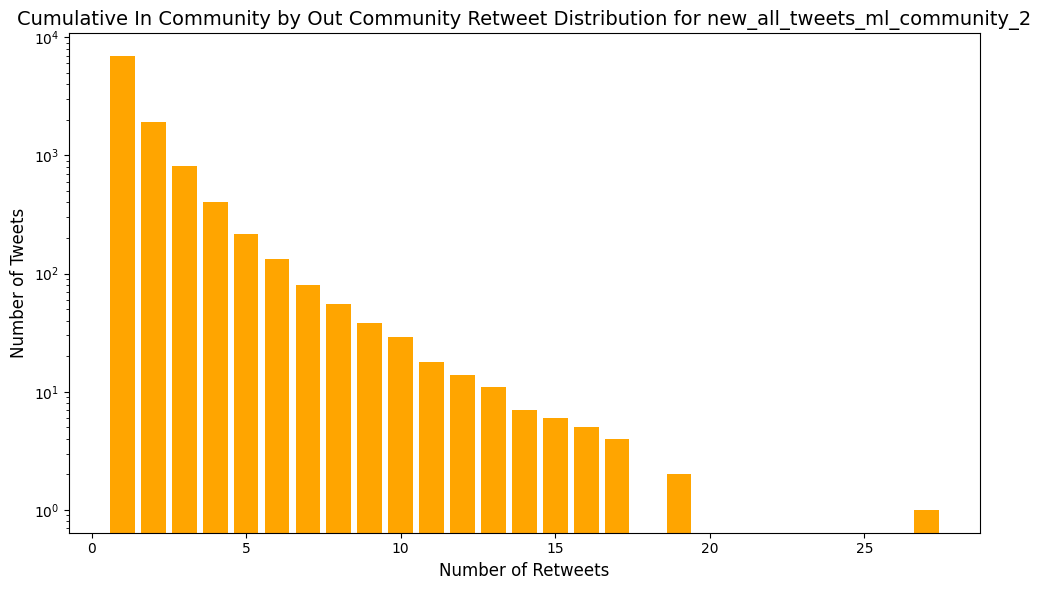

    retweet_count  total_tweets  at_least
0               1         13112     17882
1               2          3185      4770
2               3           941      1585
3               4           355       644
4               5           142       289
5               6            65       147
6               7            41        82
7               8            14        41
8               9            14        27
9              10             3        13
10             11             4        10
11             13             2         6
12             14             1         4
13             19             1         3
14             28             1         2
15             30             1         1


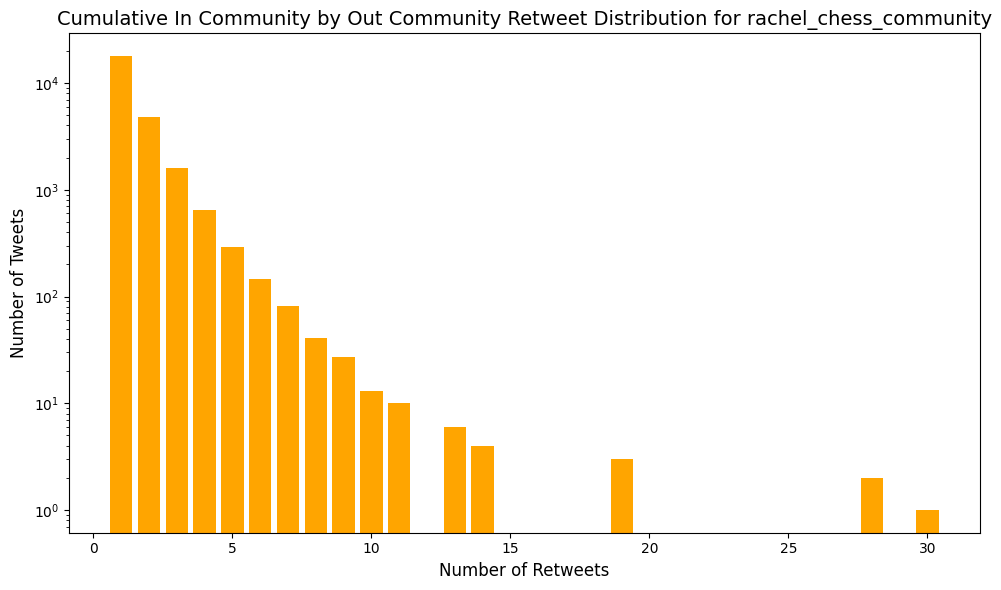

In [5]:
for community, df in all_retweets_out_community.items():
    retweet_count = df.groupby('retweet_id').size().reset_index(name='retweet_count')
    count_category = retweet_count.groupby('retweet_count').size().reset_index(name='total_tweets')
    count_category = count_category.sort_values(by='retweet_count')
    count_category['at_least'] = count_category['total_tweets'][::-1].cumsum()
    print(count_category)

    plt.figure(figsize=(10, 6))
    plt.bar(count_category['retweet_count'], count_category['at_least'], color='orange')
    plt.xlabel('Number of Retweets', fontsize=12)
    plt.ylabel('Number of Tweets', fontsize=12)
    plt.title(f'Cumulative In Community by Out Community Retweet Distribution for {community}', fontsize=14)

    plt.yscale('log')
    plt.tight_layout()
    plt.show()

### In by Out Community
- out community tweets that were retweeted by in community members

    retweet_count  total_tweets  at_least
0               1         58650     65160
1               2          4731      6510
2               3          1094      1779
3               4           356       685
4               5           148       329
5               6            98       181
6               7            37        83
7               8            20        46
8               9             9        26
9              10             7        17
10             11             4        10
11             12             1         6
12             13             2         5
13             14             2         3
14             20             1         1


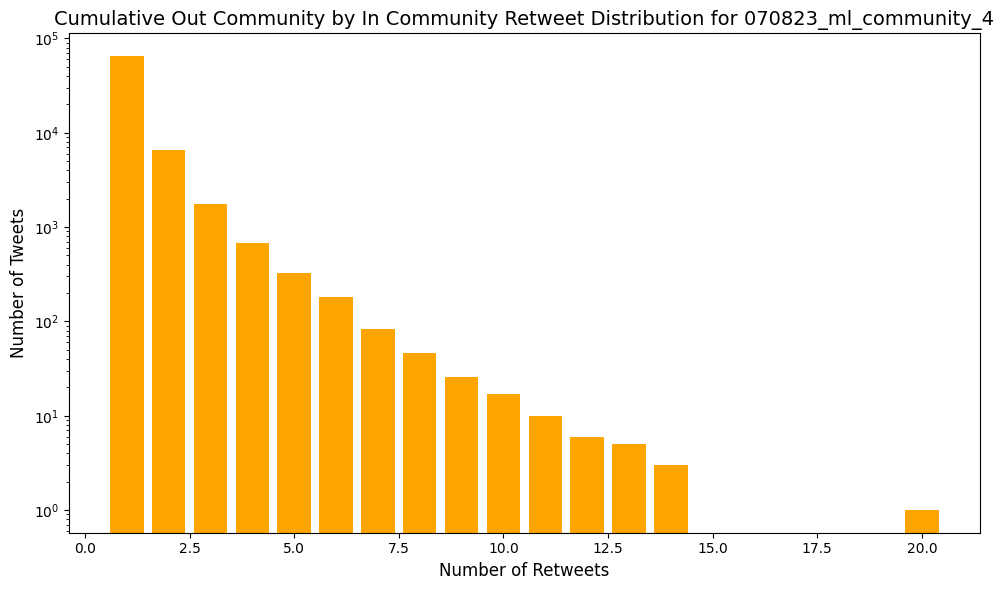

    retweet_count  total_tweets  at_least
0               1         22337     41283
1               2         15551     18946
2               3          1634      3395
3               4          1025      1761
4               5           320       736
5               6           201       416
6               7            67       215
7               8            59       148
8               9            24        89
9              10            13        65
10             11            20        52
11             12             8        32
12             13             6        24
13             14             7        18
14             15             2        11
15             16             2         9
16             17             2         7
17             18             2         5
18             20             1         3
19             22             2         2


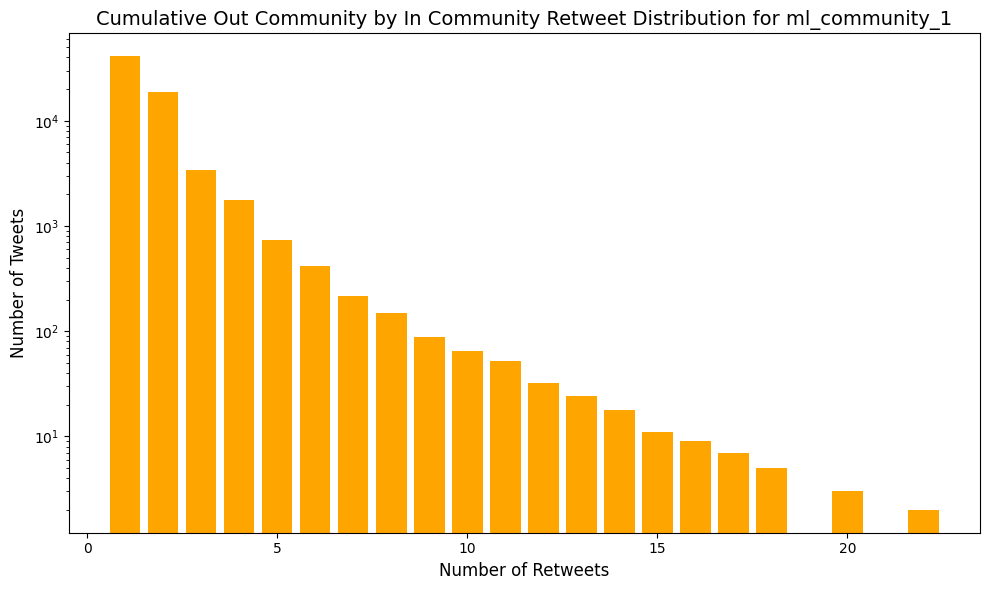

    retweet_count  total_tweets  at_least
0               1         43272     49367
1               2          4257      6095
2               3          1098      1838
3               4           378       740
4               5           168       362
5               6            89       194
6               7            47       105
7               8            22        58
8               9            16        36
9              10             6        20
10             11             1        14
11             12             4        13
12             13             2         9
13             14             1         7
14             15             1         6
15             16             3         5
16             19             1         2
17             20             1         1


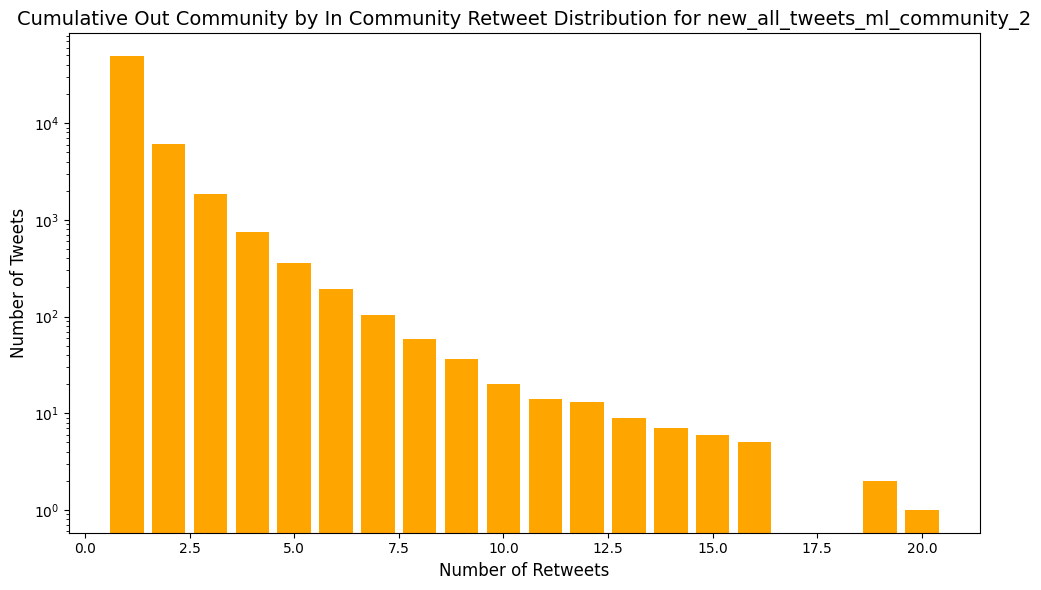

    retweet_count  total_tweets  at_least
0               1         26424     29014
1               2          2122      2590
2               3           331       468
3               4            81       137
4               5            35        56
5               6            11        21
6               7             5        10
7               8             1         5
8               9             1         4
9              10             1         3
10             11             1         2
11             13             1         1


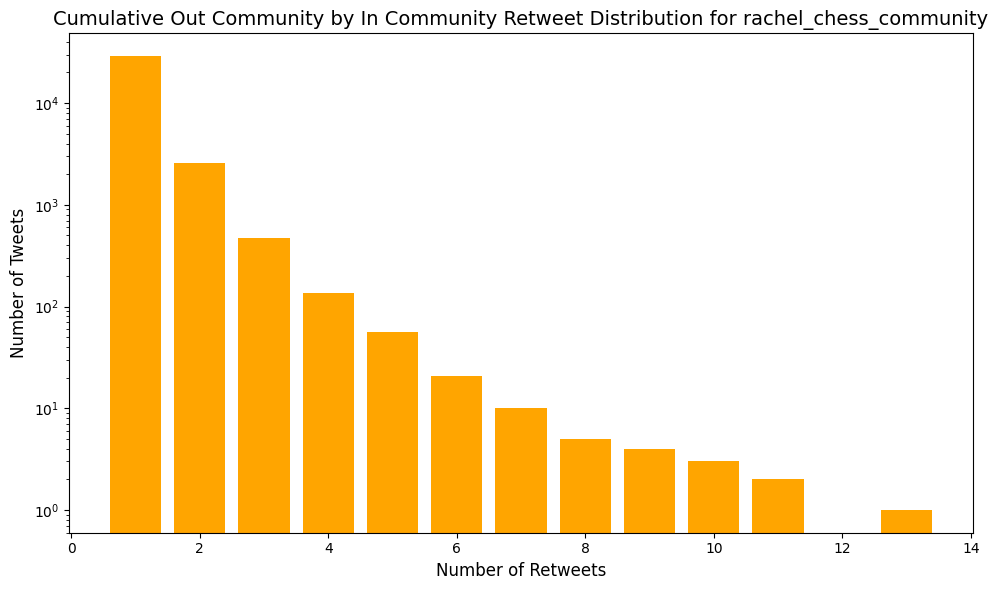

In [6]:
for community, df in all_retweets_out_by_in_community.items():
    retweet_count = df.groupby('retweet_id').size().reset_index(name='retweet_count')
    count_category = retweet_count.groupby('retweet_count').size().reset_index(name='total_tweets')
    count_category = count_category.sort_values(by='retweet_count')
    count_category['at_least'] = count_category['total_tweets'][::-1].cumsum()
    print(count_category)

    plt.figure(figsize=(10, 6))
    plt.bar(count_category['retweet_count'], count_category['at_least'], color='orange')
    plt.xlabel('Number of Retweets', fontsize=12)
    plt.ylabel('Number of Tweets', fontsize=12)
    plt.title(f'Cumulative Out Community by In Community Retweet Distribution for {community}', fontsize=14)

    plt.yscale('log')
    plt.tight_layout()
    plt.show()

## Third Step
- Find the tweet with the most retweet count

In [7]:
# now find the most number of tweets from each community and plot it
result = []
eligible_tweets = {}

min_tweet_count = 1000

for community, retweets in all_retweets_in_community.items():
    retweet_count = retweets.groupby('retweet_id').size()
    max_retweet_count = retweet_count.max()
    max_retweet_id = retweet_count[retweet_count == max_retweet_count].index.tolist()

    # find the tweet with the most retweet
    for tid in max_retweet_id:
        tweet_info = retweets.loc[retweets['retweet_id'] == tid, ['text', 'retweet_user_id']].iloc[0]
        user_table = all_user_info[community]
        tweet_user = user_table.loc[user_table['userid'] == tweet_info['retweet_user_id'], ['userid', 'username', 'rank']].iloc[0]

        result.append({
            'Community': community, 
            'tweet_id': tid, 
            'text': tweet_info['text'],
            'count': max_retweet_count, 
            'userid': tweet_user['userid'],
            'username': tweet_user['username'], 
            'rank': tweet_user['rank']
        })

result_df = pd.DataFrame(result)  
pd.set_option('display.width', 1000) 
result_df 

,Community,tweet_id,text,count,userid,username,rank
0,070823_ml_community_4,1470094581953970176,"RT @hugo_larochelle: Today, @RaiaHadsell, @kch...",17,3333052551,hugo_larochelle,42
1,070823_ml_community_4,1535055886913220608,RT @jaschasd: After 2 years of work by 442 con...,17,65876824,jaschasd,58
2,070823_ml_community_4,1575576632068214784,"RT @poolio: Happy to announce DreamFusion, our...",17,14103014,poolio,19
3,ml_community_1,1470094581953970176,"RT @hugo_larochelle: Today, @RaiaHadsell, @kch...",42,3333052551,hugo_larochelle,79
4,new_all_tweets_ml_community_2,1470094581953970176,"RT @hugo_larochelle: Today, @RaiaHadsell, @kch...",28,3333052551,hugo_larochelle,23
5,rachel_chess_community,1504409339448147968,RT @Eljanov: Since my native city Kharkiv is h...,9,279565150,Eljanov,71


# Doc2Vec & KMeans

In [40]:
# OG tweets with retweets in community - at least once
# at_least_x_in = {}
# for community, tweets in all_retweets_in_community.items():
#     retweet_count = tweets.groupby('retweet_id').size().reset_index(name='retweet_count')
#     retweets_at_least_once = retweet_count[retweet_count['retweet_count'] >= 2]
#     once_ids = set(retweets_at_least_once['retweet_id'])
#     at_least_x_in[community] = once_ids

# tweets_to_check = {}
# for community, tweets_df in all_original_tweets.items():
#     retweet_ids_set = at_least_x_in.get(community, set())
#     filtered_df = tweets_df[tweets_df['id'].isin(retweet_ids_set)]
#     tweets_to_check[community] = filtered_df
#     print(f"{community}: {filtered_df.shape[0]} tweets retained.")

# !only checking the core user
tweets_to_check = {}
for community, tweets_df in all_original_tweets.items():
    if community == 'ml_community_1':
        tweets = tweets_df[tweets_df['user_id'] == 911297187664949248]
        tweets_to_check[community] = tweets

for community, tweets_df in all_retweets_in_community.items():
    if community == 'ml_community_1':
        retweets = tweets_df[tweets_df['user_id'] == 911297187664949248]
        print(retweets.size)
        if community in tweets_to_check:
            # Append the retweets DataFrame to the existing DataFrame in tweets_to_check
            tweets_to_check[community] = pd.concat([tweets_to_check[community], retweets], ignore_index=True)
        else:
            # If the community is not in tweets_to_check, create a new entry
            tweets_to_check[community] = retweets

for community, tweets_df in all_retweets_out_community.items():
    if community == 'ml_community_1':
        retweets = tweets_df[tweets_df['user_id'] == 911297187664949248]
        if community in tweets_to_check:
            # Append the retweets DataFrame to the existing DataFrame in tweets_to_check
            tweets_to_check[community] = pd.concat([tweets_to_check[community], retweets], ignore_index=True)
        else:
            # If the community is not in tweets_to_check, create a new entry
            tweets_to_check[community] = retweets

for community, tweets_df in all_retweets_out_by_in_community.items():
    if community == 'ml_community_1':
        retweets = tweets_df[tweets_df['user_id'] == 911297187664949248]
        if community in tweets_to_check:
            # Append the retweets DataFrame to the existing DataFrame in tweets_to_check
            tweets_to_check[community] = pd.concat([tweets_to_check[community], retweets], ignore_index=True)
        else:
            # If the community is not in tweets_to_check, create a new entry
            tweets_to_check[community] = retweets





1300


In [41]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

for community, tweets in tweets_to_check.items():
    tweets = tweets.copy()
    # 1. lower case & strip trailing whitespace & remove rt
    tweets.loc[:, 'text'] = tweets['text'].str.lower().str.strip()
    tweets.loc[:, 'text'] = tweets['text'].str.replace(r'^rt\s+', '', regex=True)

    # 2. remove mentions
    tweets.loc[:, 'text'] = tweets['text'].str.replace(r'@\S+', '', regex=True)

    # 3. remove urls
    tweets.loc[:, 'text'] = tweets['text'].str.replace(r'http\S+|www\S+', ' ', regex=True)

    # 4. remove punctuation
    tweets.loc[:, 'text'] = tweets['text'].str.replace(f"[{string.punctuation}]", ' ', regex=True)

    # 5. remove non-alphabetic characters
    tweets.loc[:, 'text'] = tweets['text'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

    # 6. remove extra whitespace
    tweets.loc[:, 'text'] = tweets['text'].str.replace(r'\s+', ' ', regex=True).str.strip()

    # 7. remove stopwords and lemmatize
    tweets['tokens'] = tweets['text'].apply(
        lambda x: [lemmatizer.lemmatize(word) for word in x.split() if word not in stop_words]
    )

    tweets_to_check[community] = tweets


[nltk_data] Downloading package stopwords to /Users/apple/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/apple/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
# creating the tag document for doc2vec
from gensim.models.doc2vec import TaggedDocument
community_tagged_doc = {}

for community, tweets in tweets_to_check.items():
    tweets = tweets.reset_index(drop=True)

    tagged_doc = []
    for index, row in tweets.iterrows():
        tag = f"{community}_{index}"
        tagged_doc.append(TaggedDocument(words=row['tokens'], tags=[tag]))
    community_tagged_doc[community] = tagged_doc

In [11]:
# train Doc2Vec
from gensim.models import Doc2Vec

community_d2v_model = {}
for community, tagged_doc in community_tagged_doc.items():
    model = Doc2Vec(vector_size=100, min_count=2, epochs=100, workers=4) # according to the paper, dimention is 100 and iteration is also 100 (epochs)
    model.build_vocab(tagged_doc)
    model.train(tagged_doc, total_examples=model.corpus_count, epochs=model.epochs)
    community_d2v_model[community] = model

In [15]:
# Kmeans
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from wordcloud import WordCloud

community_cluster = {}
n_clusters = 8
for community, model in community_d2v_model.items():
    doc_tags = model.dv.index_to_key
    doc_vectors = [model.dv[tag] for tag in doc_tags]

    doc_vectors_array = np.array(doc_vectors)

    # ! PCA and t-sne visualization for vectors
    # pca = PCA().fit(doc_vectors_array)
    # plt.plot(np.cumsum(pca.explained_variance_ratio_))
    # plt.xlabel('Number of Components')
    # plt.ylabel('Cumulative Explained Variance')
    # plt.show()

    # tsne = TSNE(n_components=2, perplexity=30, random_state=42)
    # tsne_results = tsne.fit_transform(doc_vectors_array)

    # plt.figure(figsize=(12, 8))
    # plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=1)
    # plt.title('t-SNE Visualization of Document Vectors')
    # plt.show()

    # ! PCA analysis first
    # pca = PCA(n_components=0.95, random_state=42)
    # reduced_vectors = pca.fit_transform(doc_vectors_array)

    # cluster_range = range(2, 21)
    # n_clusters_list = []
    # silhouette_scores = []  
    # for n_cluster in cluster_range:
    #     kmeans = KMeans(n_clusters=n_cluster, random_state=42)
    #     labels = kmeans.fit_predict(reduced_vectors)
    #     score = silhouette_score(reduced_vectors, labels)
    #     n_clusters_list.append(n_cluster)
    #     silhouette_scores.append(score)
    
    # # visualize the scores
    # plt.figure(figsize=(10, 6))
    # plt.plot(n_clusters_list, silhouette_scores, marker='o')
    # plt.xticks(n_clusters_list)
    # plt.xlabel('Number of Clusters')
    # plt.ylabel('Silhouette Score')
    # plt.title('Silhouette Scores for Different Numbers of Clusters')
    # plt.grid(True)
    # plt.show()

    # ! this is for 3D plot -> makes no sense
    # pca = PCA(n_components=0.95, random_state=42)
    # reduced_vectors = pca.fit_transform(doc_vectors_array)

    # # Then apply UMAP on the PCA-reduced data for 3D visualization
    # reducer = umap.UMAP(n_components=3, random_state=42)
    # umap_vectors_3d = reducer.fit_transform(reduced_vectors)

    # # Apply KMeans clustering
    # kmeans = KMeans(n_clusters=8, random_state=42)
    # labels = kmeans.fit_predict(umap_vectors_3d)

    # # Create 3D plot
    # fig = plt.figure(figsize=(10, 8))
    # ax = fig.add_subplot(111, projection='3d')
    # scatter = ax.scatter(umap_vectors_3d[:, 0], umap_vectors_3d[:, 1], umap_vectors_3d[:, 2], 
    #                     c=labels, cmap='viridis', s=10)

    # ax.set_xlabel('UMAP Dimension 1')
    # ax.set_ylabel('UMAP Dimension 2')
    # ax.set_zlabel('UMAP Dimension 3')
    # ax.set_title("3D UMAP Visualization of PCA-Reduced Clusters")

    # legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
    # ax.add_artist(legend1)

    # plt.show()



# BERT Experiement
- first we are experimenting with BERTopic

In [42]:
from collections import defaultdict

all_text = defaultdict(list)
for community, tweets in tweets_to_check.items():
    lst = tweets['tokens'].tolist()
    for tweet in lst:
        all_text[community].append(' '.join(tweet))

In [63]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

for community, tweets in all_text.items():
    print(f"{community}")
    bert_model = BERTopic(
        vectorizer_model=vectorizer_model,
        language='english', calculate_probabilities=True,
        verbose=True
    )
    topics, probabilities = bert_model.fit_transform(tweets)

    bert_model.reduce_topics(
        docs=tweets,
        nr_topics=10
    )

    pd.set_option('display.width', 1000) 
    pd.set_option('display.colheader_justify', 'center')    

    new_topic_info = bert_model.get_topic_info()
    print(new_topic_info.to_string())
    bert_model.visualize_topics()
    fig = bert_model.visualize_topics()
    fig.write_html(f"topics_visualization_{community}_in_community_retweet.html")
    bert_model.visualize_hierarchy()
    


2024-10-30 14:15:39,089 - BERTopic - Embedding - Transforming documents to embeddings.


ml_community_1


Batches:   0%|          | 0/77 [00:00<?, ?it/s]

2024-10-30 14:15:42,280 - BERTopic - Embedding - Completed ✓
2024-10-30 14:15:42,281 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-10-30 14:15:50,040 - BERTopic - Dimensionality - Completed ✓
2024-10-30 14:15:50,041 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-30 14:15:50,642 - BERTopic - Cluster - Completed ✓
2024-10-30 14:15:50,646 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-30 14:15:50,817 - BERTopic - Representation - Completed ✓
2024-10-30 14:15:51,020 - BERTopic - Topic reduction - Reducing number of topics
2024-10-30 14:15:51,107 - BERTopic - Topic reduction - Reduced number of topics from 91 to 10


   Topic  Count                    Name                                                                                Representation                                                                                                                                                                                                  Representative_Docs                                                                                                                                       
0   -1     437                 -1_learning_deep_new_google                                                                   [learning, deep, new, google, model, work, video, open, amp, great]  [delighted announce camera ready version new book machine learning advanced topic finally avai, excited share survey vast landscape efficiency deep learning make deep learning model small, delighted announce real camera ready version new book probabilistic machine learning advanced top]
1    0    1196                     0

## Recompute the social rank and analyze the social rank

In [1]:
import pymongo
import json
from tqdm import tqdm
from typing import Dict

/Users/apple/Downloads/CSC_494/granger_analysis_on_tweet/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [7]:
def calculate_social_support(db_name: str, user_id: int, alpha=1.0):
    # first define the collections needed
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    original_tweets_collection = client[db_name]['original_tweets']
    retweets_in_community_collection = client[db_name]['retweets_of_in_community']
    user_info_collection = client[db_name]['user_info']

    score = [0, 0]
    user_ids = [user["userid"] for user in user_info_collection.find()]
    friends = create_friends_list(user_ids, db_name)
    tweets = [tweet for tweet in original_tweets_collection.find()] + [tweet for tweet in retweets_in_community_collection.find()]
    # omit self retweets
    tweets = [tweet for tweet in tweets if tweet['user_id'] != tweet['retweet_user_id']]
    tweets_by_retweet_group = _group_by_retweet_id(tweets)
    def get_retweets_of_tweet_id(tweet_id):
        return tweets_by_retweet_group.get(str(tweet_id), [])
    def get_later_retweets_of_tweet_id(tweet_id, created_at):
        return [tweet for tweet in get_retweets_of_tweet_id(tweet_id) if tweet["created_at"] > created_at]
    def is_direct_follower(a, b):
        # b follows a
        return a in friends.get(b, [])
    
    score[1] = user_info_collection.find_one({"userid": user_id})["global follower"]
    user_tweets = [tweet for tweet in tweets if tweet["user_id"] == user_id]
    original_tweet_ids = [tweet["id"] for tweet in user_tweets if tweet["retweet_id"] is None]
    count = 0
    for og_tweet_id in original_tweet_ids:
        retweets = get_retweets_of_tweet_id(og_tweet_id)
        score[0] += len(retweets)
        count += len(retweets)

        user_retweets = [tweet for tweet in tweets if tweet['retweet_id'] is not None]
        for user_retweet in user_retweets:
            retweets = get_later_retweets_of_tweet_id(user_retweet["retweet_id"], user_retweet["created_at"])
            # the person who retweeted is a direct follower of the user
            retweets_from_direct_followers = [rtw for rtw in retweets if is_direct_follower(user_id, str(rtw["user_id"]))]
            score[0] += len(retweets_from_direct_followers) * alpha

    return score, user_info_collection.find_one({"userid": user_id})["rank"]

def create_friends_list(user_ids: list, db_name: str):
    friends = {}
    client = pymongo.MongoClient("mongodb://localhost:27017/")
    community_info_collection = client[db_name]["user_info"]
    for user_id in user_ids:
        friends_of_user_id = community_info_collection.find_one({"userid": user_id})["local following list"]
        friends[user_id] = [str(id) for id in friends_of_user_id]
    return friends

def _group_by_retweet_id(tweets) -> Dict:
    # Puts all tweets with the same retweet_id in the same list
    # Returns: A dictionary where the key is the retweet_id and
    # the value is the list of tweets with that retweet_id
    dict = {}
    for tweet in tweets:
        if tweet["retweet_id"] is not None:
            key = str(tweet["retweet_id"])
            if key in dict:
                dict[key].append(tweet)
            else:
                dict[key] = [tweet]
    return dict

In [8]:
for community, users in all_user_info.items():
    if community == 'rachel_chess_community':
        scores = {}
        for user_id in users['userid']:
            scores[user_id] = calculate_social_support(community, int(user_id))

        ranked_ids = list(sorted(scores, key=lambda x: (scores[x][0], scores[x][1]), reverse=True))

        users['score'] = users['userid'].apply(lambda x: scores[int(x)])
        users['new_rank'] = users['userid'].apply(lambda x: ranked_ids.index(x))
        temp = pd.DataFrame({
            'userid': users['userid'],
            'rank': users['rank'], 
            'new_rank': users['new_rank'], 
            'score': users['score'], 
            'username': users['username']
        })
        temp = temp.sort_values(by='new_rank')
        pd.set_option('display.max_rows', None)
        print(temp)
    else:
        continue
    

KeyboardInterrupt: 

In [9]:
print(calculate_social_support("rachel_chess_community", 23612012))

([341.0, 37487], 2)


In [102]:
len(tweets_to_check['ml_community_1'])

2439

# Open AI

In [4]:
from openai import OpenAI
import pandas as pd
import json
from decimal import Decimal
import pymongo
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
BATCH_SIZE = 20

/Users/apple/Downloads/CSC_494/granger_analysis_on_tweet/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [8]:
client = MongoClient('localhost', 27017)

databases = ['ml_community_1']
all_tweets = {}
all_user_info = {}

for db_name in databases:
    db = client[db_name]

    # get OG tweets
    og_tweet_collection = db['original_tweets']
    og_tweet_df = pd.DataFrame(list(og_tweet_collection.find()))
    og_tweet_df['user_id'] = og_tweet_df['user_id'].astype(int)
    og_tweet_df['id'] = og_tweet_df['id'].astype(int)

    # get retweet of out commmunity
    retweet = db['retweets_of_out_community_by_in_community']
    retweet_df = pd.DataFrame(list(retweet.find()))
    retweet_df['user_id'] = retweet_df['user_id'].astype(int)
    retweet_df['id'] = retweet_df['id'].astype(int)

    combined_df = pd.concat([og_tweet_df, retweet_df], ignore_index=True)
    all_tweets[db_name] = combined_df

    user_collection = db['user_info']
    user_df = pd.DataFrame(list(user_collection.find()))
    user_df['userid'] = user_df['userid'].astype(int)
    all_user_info[db_name] = user_df


/var/folders/7w/hmrfybrx5s728_f1ygml_c200000gq/T/ipykernel_82572/2404351793.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([og_tweet_df, retweet_df], ignore_index=True)


In [ ]:
output_file_path = "topciextraction.txt"
file = open(output_file_path, 'w')

system_instruction = f"""
Read the text below and list up to 3 topics. Each topic should contain fewer than 3 words. Ensure you only return the topic and nothing more.
The desired output format:
Topic 1: xxx\nTopic 2: xxx\nTopic 3: xxx
"""

unique_topics = set()
client = OpenAI(api_key="")

for community, tweet_df in all_tweets.items():
    NUM_TWEETS = len(tweet_df)
    batch_iter = 0
    num_iters = (NUM_TWEETS + BATCH_SIZE - 1) // BATCH_SIZE

    while batch_iter < num_iters and batch_iter * BATCH_SIZE <= NUM_TWEETS:
        text_input = ""
        for i in range(batch_iter * BATCH_SIZE, min((batch_iter + 1) * BATCH_SIZE, len(tweet_df))):
            text_input += f"Tweet {i + 1}: {tweet_df.iloc[i]}\n"

        messages = [
            {"role": "system", "content": system_instruction},
            {"role": "user", "content": text_input}
        ]

        response = client.chat.completions.create(
            model="gpt-4o-mini",
            messages=messages,
            max_tokens=100,
            temperature=0.5
        )

        topics = response.choices[0].message.content.strip().split('\n')

        for topic in topics:
            topic_text = topic.split(": ")[1]
            unique_topics.add(topic_text)

        batch_iter += 1
    
    for topic in unique_topics:
        file.write(f"{topic}\n")

    file.close()

In [ ]:
# topic summary 
file_path = "topciextraction.txt"
with open(file_path, 'r') as file:
    topics_string = file.read()

output_file_path = "summary.txt"
file = open(output_file_path, 'w')

system_instruction = f"""
Summarize and merge the following list of topics into 10 final topics
"""
messages = [
    {"role": "system", "content": system_instruction},
    {"role": "user", "content": topics_string}
]

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=messages,
    max_tokens=200,
    temperature=0.5
)

topics = response.choices[0].message.content.strip()


In [14]:
with open(output_file_path, 'w') as output_file:
    output_file.write(topics)